In [1]:
import numpy as np
import pandas as pd
import timeit
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from main import MeasurementControlEnvironment

### Create Game Environment and RL Wrapper (This initializes NN at random)

Toy Measurement Control Initialized
Using device: cuda
Model loaded
Obstacle Reward: -0.0
Trace Delta Reward: 0.713676304424613
Explore Reward: 0.1199
Total Reward: 0.8335763044246131


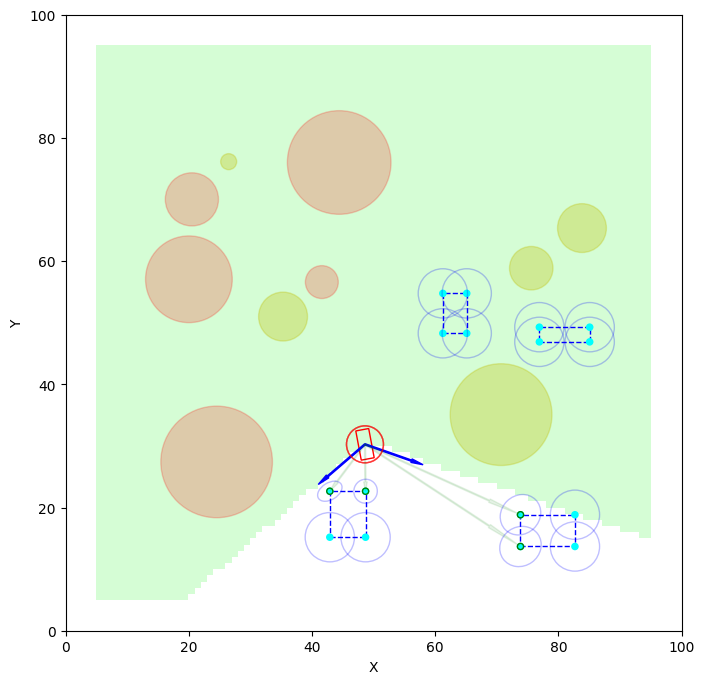

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment(init_reset=False)
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)
env.reset(first_update=True, print_rewards=True)
env.draw_state(env.get_state())

### Run the search

In [3]:
# Get starting state
state = env.get_state()
print(f'Starting car state: {state[0]}')
# rl.plot_state_image(state)

print('Starting MCTS search...')
start_time = timeit.default_timer()
best_action_idx, root = mcts_search(env, rl, state, learning_iterations=1000,
                                    explore_factor=0.5, discount_factor=0.9)
print(f'Finished in {timeit.default_timer() - start_time} seconds')

Starting car state: [48.5921382  30.25752468  0.         -1.38487232  0.          0.        ]
Starting MCTS search...
Finished in 4.696207733000392 seconds


### Plot (also open tree_visualization.html in browser)

Making tree visualization, this takes a while for a large tree...
Plotting starting state with search tree overlayed...
Getting best action trajectory...
35 actions in best trajectory


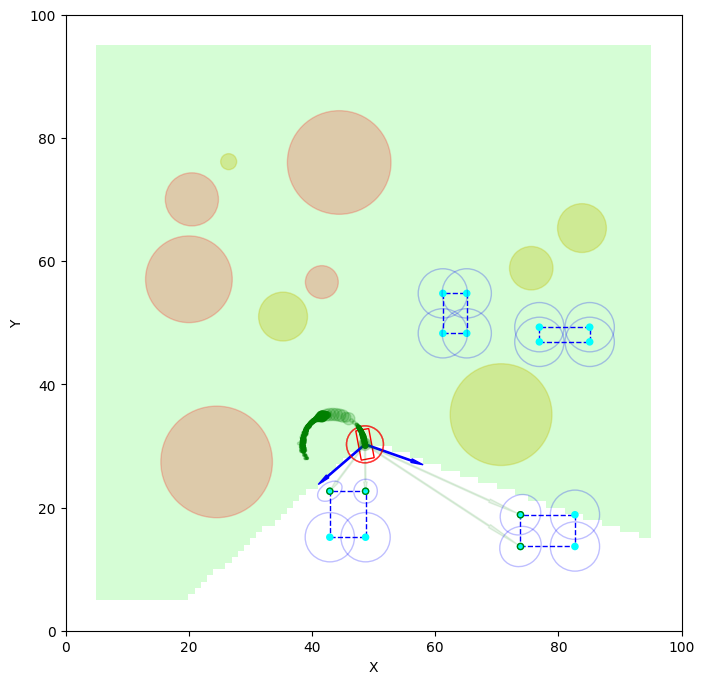

In [5]:
# Create the tree visualization html file
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.action_space, show_unsimulated=False)

# Plot the starting state with the search tree overlayed
print('Plotting starting state with search tree overlayed...')
env.draw_state(state, plot_explore_grid=True, root_node=root, scaling=4, bias=0.1, max=1., rew=True)

# Get the action trajectory
print('Getting best action trajectory...')
actions = get_best_action_trajectory(root, highest_Q=True)
print(f'{len(actions)} actions in best trajectory')
truncated_actions = actions[:30]
env.draw_action_set(root, truncated_actions)